**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*


In [15]:
from __future__ import print_function, division
import pylab as pl

import os
import json
s = json.load( open(os.getenv('PUI2018')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

import statsmodels.api as sm
import statsmodels.formula.api as smf
np.random.seed(99)
%pylab inline


Populating the interactive namespace from numpy and matplotlib


In [46]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)

    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

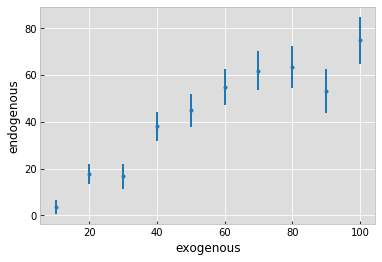

In [65]:
x = np.linspace(10,100,10)
y = line(0.7, x, b=0, errors=errors)

pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel("exogenous")
pl.ylabel("endogenous");

# print y, x, and the result of applying statsmodels.api.add_constant() to x

In [95]:
y

array([ 80.67975192,  79.45332595,  99.05518218, 104.42777918,
       112.11427481, 119.72530392, 124.97728315, 126.00581014,
       126.04335354, 145.12437307])

In [96]:
x

array([ 10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.])

In [97]:
sm.add_constant(x)

array([[  1.,  10.],
       [  1.,  20.],
       [  1.,  30.],
       [  1.,  40.],
       [  1.,  50.],
       [  1.,  60.],
       [  1.,  70.],
       [  1.,  80.],
       [  1.,  90.],
       [  1., 100.]])

# use statsmodels.api.OLS to fit x and y 
- *the wrong way*: by passing x as exogenous variable
- *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

print the model summary for each and discuss the differences

In [98]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     85.90
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           6.71e-06
Time:                        12:06:33   Log-Likelihood:                -49.732
No. Observations:                  10   AIC:                             101.5
Df Residuals:                       9   BIC:                             101.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7408      0.188      9.268      0.000       1.316       2.166
==============================================================================
Omnibus:                        1.223   Durbin-Watson:                   0.115
Prob(Omnibus):                  0.543   Jarque-Bera (JB):                0.711
Skew:                          -0.180   Prob(JB):                        0.701
Kurtosis:                       1.745   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
smfitDoneRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitDoneRight.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           4.26e-06
Time:                        12:06:34   Log-Likelihood:                -30.257
No. Observations:                  10   AIC:                             64.51
Df Residuals:                       8   BIC:                             65.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7558      3.809     19.628      0.000      65.973      83.539
x1             0.6728      0.061     10.961      0.000       0.531       0.814
==============================================================================
Omnibus:                        2.745   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.705
Skew:                          -0.956   Prob(JB):                        0.426
Kurtosis:                       2.340   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# plot the data (as points) and both statsmodels fits

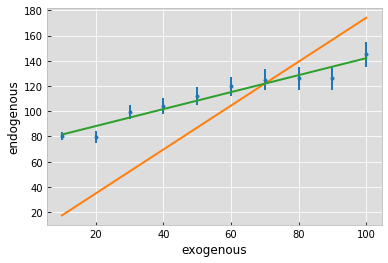

In [100]:
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit.fittedvalues, '-')
pl.plot(x, smfitDoneRight.fittedvalues, '-')
pl.xlabel("exogenous")
pl.ylabel("endogenous");

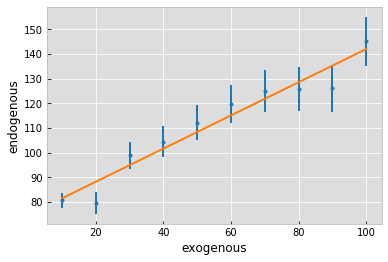

In [101]:
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x,smfitDoneRight.fittedvalues, '-')
pl.xlabel("exogenous")
pl.ylabel("endogenous");

# create a line with a chosen slope and a chosen intercept >10*slope and plot it with uncertainties as errorbars

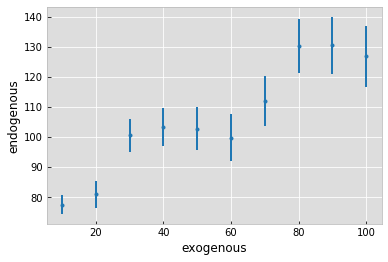

In [102]:
x = np.linspace(10,100,10)
y = line(0.7, x, b=70, errors=errors)

pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.xlabel("exogenous")
pl.ylabel("endogenous");

# repeat step 3

In [103]:
smfit = smf.OLS(y, x).fit()
smfit.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     76.83
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           1.06e-05
Time:                        12:06:46   Log-Likelihood:                -49.730
No. Observations:                  10   AIC:                             101.5
Df Residuals:                       9   BIC:                             101.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.6461      0.188      8.765      0.000       1.221       2.071
==============================================================================
Omnibus:                        0.942   Durbin-Watson:                   0.142
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.625
Skew:                          -0.098   Prob(JB):                        0.732
Kurtosis:                       1.792   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [104]:
smfitDoneRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitDoneRight.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     59.25
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           5.76e-05
Time:                        12:06:47   Log-Likelihood:                -32.379
No. Observations:                  10   AIC:                             68.76
Df Residuals:                       8   BIC:                             69.36
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.3309      4.709     15.785      0.000      63.472      85.190
x1             0.5842      0.076      7.698      0.000       0.409       0.759
==============================================================================
Omnibus:                        1.262   Durbin-Watson:                   1.706
Prob(Omnibus):                  0.532   Jarque-Bera (JB):                0.721
Skew:                           0.184   Prob(JB):                        0.697
Kurtosis:                       1.738   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# repeat step 4

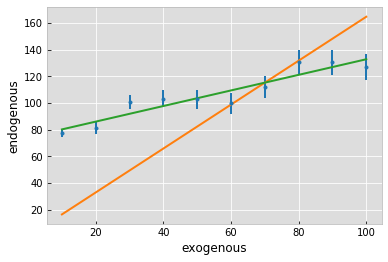

In [105]:
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfit.fittedvalues, '-')
pl.plot(x, smfitDoneRight.fittedvalues, '-')
pl.xlabel("exogenous")
pl.ylabel("endogenous");

# now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [106]:
smfitW = smf.WLS(y, sm.add_constant(x), weights=1.0/errors(x)**2).fit()
smfitW.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.907
Model:                            WLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     77.79
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           2.15e-05
Time:                        12:06:51   Log-Likelihood:                -32.296
No. Observations:                  10   AIC:                             68.59
Df Residuals:                       8   BIC:                             69.20
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.3408      3.048     23.733      0.000      65.312      79.370
x1             0.6204      0.070      8.820      0.000       0.458       0.783
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.662   Jarque-Bera (JB):                0.700
Skew:                           0.490   Prob(JB):                        0.705
Kurtosis:                       2.150   Cond. No.                         70.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
smfitDoneRight.summary()

//anaconda/envs/GEOP/lib/python3.6/site-packages/scipy/stats/stats.py:1390: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     120.1
Date:                Thu, 08 Nov 2018   Prob (F-statistic):           4.26e-06
Time:                        12:02:43   Log-Likelihood:                -30.257
No. Observations:                  10   AIC:                             64.51
Df Residuals:                       8   BIC:                             65.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         74.7558      3.809     19.628      0.000      65.973      83.539
x1             0.6728      0.061     10.961      0.000       0.531       0.814
==============================================================================
Omnibus:                        2.745   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.253   Jarque-Bera (JB):                1.705
Skew:                          -0.956   Prob(JB):                        0.426
Kurtosis:                       2.340   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

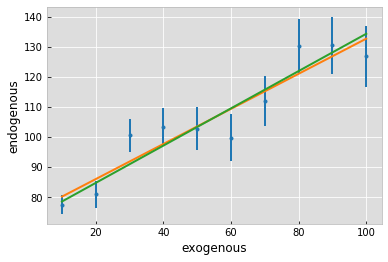

In [107]:
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-')
pl.plot(x, smfitW.fittedvalues, '-')
pl.xlabel("exogenous")
pl.ylabel("endogenous");